In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# assign artist data into df
df = pd.read_csv('artist.csv')
df.head()

,artist_id,full_name,first_name,middle_names,last_name,nationality,style,birth,death
0,500,Pierre-Auguste Renoir,Pierre,Auguste,Renoir,French,Impressionist,1841,1919
1,501,Alexandre Cabanel,Alexandre,NaN,Cabanel,French,Classicist,1823,1889
2,502,James Ensor,James,NaN,Ensor,Belgian,Expressionist,1860,1949
3,503,Maximilien Luce,Maximilien,NaN,Luce,French,Pointillist,1858,1941
4,504,August Macke,August,NaN,Macke,German,Expressionist,1887,1914


In [5]:
# looking to see if there are any missing values
df.isna().sum()

artist_id         0
full_name         0
first_name        0
middle_names    273
last_name         0
nationality       0
style             0
birth             0
death             0
dtype: int64

In [7]:
df2 = pd.read_csv('work.csv')
df2.head()

,work_id,name,artist_id,style,museum_id
0,160228,Still Life with Flowers and a Watch,615,Baroque,43.0
1,160236,Still Life with Fruit and a Beaker on a Cock's...,615,Baroque,43.0
2,160244,Still Life with Fruit and a Goldfinch,615,Baroque,43.0
3,160252,Still Life with Fruit and Oysters,615,Baroque,43.0
4,160260,"Still Life with Fruit, Oysters, and a Porcelai...",615,Baroque,43.0


In [9]:
# looking to see if there are any missing values, we have some works that missing style and museum_id values but that shouldn't be a problem for us.
df2.isna().sum()

work_id          0
name             0
artist_id        0
style         1286
museum_id    10223
dtype: int64

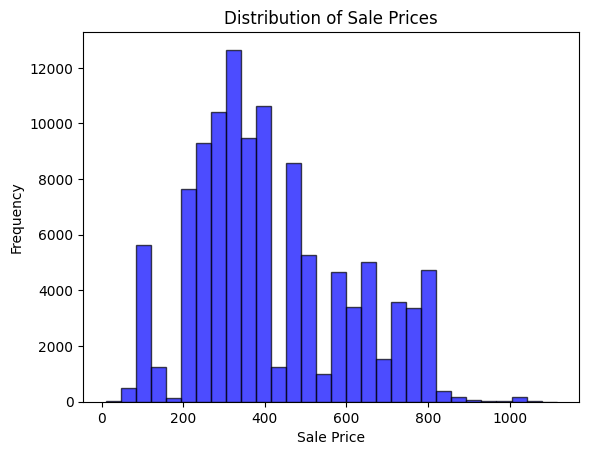

In [18]:
#Find prices of artworks in which they get sold at.
# We read the product_size file and specify to use columns sale_price and work_id
# Then we want to specify their datatype, for sale_price since its a monetary value we go with float and for work_id it should be an integer.
# Do the same with work datafile.
product_size_df = pd.read_csv('product_size.csv', usecols=['sale_price', 'work_id'], dtype={'sale_price': 'float', 'work_id': 'int'})
work_df = pd.read_csv('work.csv', usecols=['work_id', 'name'], dtype={'work_id': 'int', 'name': 'str'})

# merge/join on work_id
merged_df = pd.merge(product_size_df, work_df, on='work_id')

# Using histogram to visualize data
plt.hist(merged_df['sale_price'], bins=30, color='blue', alpha=0.7,edgecolor='black')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


In [43]:
#Find out if bigger canvas size has impact on product sale price
#First we read the both cvs files using appropirate names
product_size_df = pd.read_csv('product_size.csv')
canvas_size_df = pd.read_csv('canvas_size.csv')

#Then we convert the 'size_id' column in canvas_size_df to object (string) dtype
#We do this because we cant merge on a different datatypes
canvas_size_df['size_id'] = canvas_size_df['size_id'].astype(str)

# Lastly, merge the DataFrames based on the 'size_id' column
merged_df = pd.merge(product_size_df, canvas_size_df, on='size_id')

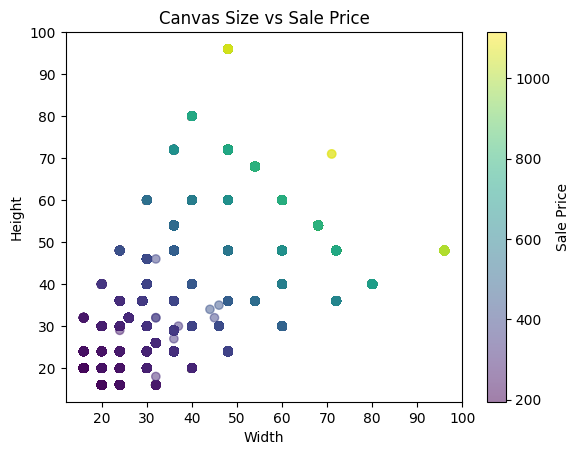

In [42]:
#Lets visualize the data using a scatterplot.
#We want to compare with and height with sale price
plt.scatter(merged_df['width'], merged_df['height'], c=merged_df['sale_price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sale Price')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Canvas Size vs Sale Price')
plt.show()